In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import xobjects as xo
import xpart as xp
import xtrack as xt
import xcoll as xc
import xfields as xf
import xdeps as xd

In [2]:
print('xcoll version: ', xc.__version__)
print('xtrack version: ', xt.__version__)
print('xpart version: ', xp.__version__)
print('xobjects version: ', xo.__version__)
print('xfields version: ', xf.__version__)
print('xdeps version: ', xd.__version__)

xcoll version:  0.4.0
xtrack version:  0.62.0
xpart version:  0.18.4
xobjects version:  0.4.1
xfields version:  0.18.0
xdeps version:  0.6.1


In [3]:
import os
package_path = os.path.dirname(xc.__file__)
print(f"Package path: {package_path}")

os.chdir(package_path)

!git branch

Package path: /afs/cern.ch/user/c/cmaccani/xsuite/xcoll/xcoll
  ForKayAsSixtrack
  ForKayBetterEtaWithTransition
  ForKayBetterEtaWithoutTransition
  NoMoreManager
  dump_length_to_yaml
  main
  release/v0.3.4
* release/v0.4.1
  to_yaml


# Loss Map

In [4]:
line = xt.Line.from_json(xc._pkg_root / '..' / 'examples' / 'machines' / 'lhc_run3_b1.json')

Loading line from dict:   0%|          | 0/101993 [00:00<?, ?it/s]

Done loading line from dict.           


In [5]:
colldb = xc.CollimatorDatabase.from_yaml(xc._pkg_root / '..' / 'examples' / 'colldb' / 'lhc_run3.yaml', beam=1, ignore_crystals=False)
colldb.install_everest_collimators(line = line, verbose=True)
df_with_coll = line.check_aperture()
assert not np.any(df_with_coll.has_aperture_problem)

Installing tdisc.a4l2.b1        as EverestCollimator
Installing tcla.a5r3.b1         as EverestCollimator
Installing tctph.4l8.b1         as EverestCollimator
Installing tcspm.6r7.b1         as EverestCollimator
Installing tcsg.6r7.b1          as EverestCollimator
Installing tctph.4l1.b1         as EverestCollimator
Installing tcsp.a4r6.b1         as EverestCollimator
Installing tclia.4r2            as EverestCollimator
Installing tcsg.b5l7.b1         as EverestCollimator
Installing tcla.6r3.b1          as EverestCollimator
Installing tctpv.4l1.b1         as EverestCollimator
Installing tcl.5r1.b1           as EverestCollimator
Installing tcl.6r1.b1           as EverestCollimator
Installing tcl.5r5.b1           as EverestCollimator
Installing tctpv.4l5.b1         as EverestCollimator
Installing tcsg.b4l7.b1         as EverestCollimator
Installing tclib.6r2.b1         as EverestCollimator
Installing tcla.a6r7.b1         as EverestCollimator
Installing tcdqa.c4r6.b1        as EverestColl

Slicing line:   0%|          | 0/101993 [00:00<?, ?it/s]

Checking aperture:   0%|          | 0/101946 [00:00<?, ?it/s]

Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
0 thick elements miss associated aperture (upstream or downstream):
[]


In [6]:
print(line['tcp.c6l7.b1'].jaw)
print(line['tcp.c6l7.b1'].gap)

None
5.0


In [7]:
line.build_tracker()

xc.assign_optics_to_collimators(line=line)

In [8]:
cry = 'tcpcv.a6l7.b1'
tcp = 'tcp.c6l7.b1'
line[cry].gap = 5
line[cry].align_to_beam_divergence()
print(line[cry].gap)

5.0


tests on jaws

In [8]:
print(line['tcp.c6l7.b1'].jaw)
print(line['tcp.c6l7.b1'].gap)

[0.0013138622735913152, -0.0013103666449594265]
5.0


In [10]:
line['tcp.c6l7.b1'].jaw_R += 0.001
print(line['tcp.c6l7.b1'].jaw)
print(line['tcp.c6l7.b1'].gap)

[0.0013138622735913025, -0.00031036664495961356]
[5.0, -1.189357]


In [11]:
line['tcp.c6l7.b1'].gap = 5

In [12]:
print(line['tcp.c6l7.b1'].jaw_LU)
print(line['tcp.c6l7.b1'].jaw_LD)
print(line['tcp.c6l7.b1'].tilt_L)

0.0013138622735913025
0.0013138622735913025
0.0


In [13]:
line['tcp.c6l7.b1'].tilt_L = 500e-6

In [14]:
print(line['tcp.c6l7.b1'].jaw_LU)
print(line['tcp.c6l7.b1'].jaw_L)
print(line['tcp.c6l7.b1'].jaw_LD)
print(line['tcp.c6l7.b1'].tilt_L)

0.0011638622798413024
0.0013138622735913025
0.0014638622673413025
0.0005


In [15]:
print(line['tcp.c6l7.b1'].gap)

5.0


In [16]:
print(line['tcp.c6l7.b1'].gap_LU)
print(line['tcp.c6l7.b1'].gap_L)
print(line['tcp.c6l7.b1'].gap_LD)

4.428404
5.0
5.571596


In [17]:
line['tcp.c6l7.b1'].gap = 5
line['tcp.c6l7.b1'].tilt_L = 0

In [18]:
print(line['tcp.c6l7.b1'].gap_LU)
print(line['tcp.c6l7.b1'].gap_L)
print(line['tcp.c6l7.b1'].gap_LD)

5.0
5.0
5.0


In [19]:
print(line['tcp.c6l7.b1'].gap_RU)
print(line['tcp.c6l7.b1'].gap_R)
print(line['tcp.c6l7.b1'].gap_RD)

-5.0
-5.0
-5.0


In [10]:
cry = 'tcpcv.a6l7.b1'
tcp = 'tcp.c6l7.b1'

In [9]:
df = pd.DataFrame(colldb._collimator_dict)
df[[cry, tcp]]

,tcpcv.a6l7.b1,tcp.c6l7.b1
parking,0.025,0.025
gap,None,5
stage,special,primary
material,si,mogr
length,0.004,0.6
angle,90,0
family,cry7,tcp7
offset,0,0
jaw,None,None
overwritten_keys,[],[material]


In [22]:
line['tcpcv.a6l7.b1']

EverestCrystal(length=0.004, active=1, record_touches=0, record_scatterings=0, _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0, _internal_record_id=RecordIdentifier(buffer_id=0, offset=0), _sin_z=1, _cos_z=6.12e-17, _jaw_U=3, _sin_y=0, _cos_y=1, _tan_y=0, _side=1, _align=0, _gap=999, _nemitt_x=3.5e-06, _nemitt_y=3.5e-06, _bending_radius=85.1, _bending_angle=4.7e-05, width=0.005, height=0.03, miscut=0, _orient=1, _critical_angle=0, _material=CrystalMaterial(Z=14, A=28.1, density=2.33, excitation_energy=1.73e-07, nuclear_radius=0.441, nuclear_elastic_slope=120, cross_section=array([6.64e-01, 4.30e-01, 0.00e+00, 0.00e+00, 0.00e+00, 3.90e-04]), hcut=0.02, name='Silicon', _only_mcs=0, crystal_radiation_length=0.0937, crystal_nuclear_length=0.465, crystal_plane_distance=9.6e-08, crystal_potential=21.3, nuclear_collision_length=0.302), rutherford_rng=RandomRutherford(lower_val=0.000998, upper_val=0.02, A=0.00162, B=166, Newton_iterations=7, _sin_rot_s=-999, _cos_rot_s=-99

In [23]:
line['tcpcv.a6l7.b1'].gap = 5

In [24]:
line['tcpcv.a6l7.b1'].jaw

0.0017621469066118048

In [28]:
print(line[cry].jaw_U)
print(line[cry].jaw)
print(line[cry].jaw_D)
print(line[cry].tilt)
print(line[cry].angle)

0.0017621469066118048
0.0017621469066118048
0.0017622409136623855
0.0
90.0


5.0


In [17]:
print(line[cry].jaw_U)
print(line[cry].jaw)
print(line[cry].jaw_D)
print(line[cry].tilt)
print(line[cry].angle)

0.0017621469066118048
0.0017621469066118048
0.0017623075444583695
1.66577e-05
90.0


impacts

In [9]:

def _get_xcoll_elements(line=None, elements=None, names=None):
    from xcoll import element_classes
    if names is not None and names is not False and \
    (not hasattr(names, '__iter__') or isinstance(names, str)):
        names = [names]
    if elements is not None and elements is not False and \
    (not hasattr(elements, '__iter__') or isinstance(elements, str)):
        elements = [elements]
    if line is None:
        if elements is None:
            raise ValueError("No line nor elements provided!")
    else:
        if elements is not None and elements is not False:
            raise ValueError("Cannot provide both line and elements!")
        if names is None or names is True:
            elements, names = line.get_elements_of_type(element_classes)
            if len(names) == 0:
                raise ValueError("No Xcoll elements in line!")
        elif names is False:
            names = []
            elements = []
        else:
            assert elements is not False
            for name in names:
                if name not in line.element_names:
                    raise ValueError(f"Element {name} not found in line!")
            elements = [line[name] for name in names]
    for idx, element in enumerate(elements):
        if not isinstance(element, element_classes):
            name = name[idx] if names is not None else element.__class__.__name__
            raise ValueError(f"Element {name} not an Xcoll element!")
    return elements, names

In [11]:
elements, names = _get_xcoll_elements(None, line[cry], None)

In [12]:
elements

[EverestCrystal(length=0.004, active=1, record_touches=0, record_scatterings=0, _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0, _internal_record_id=RecordIdentifier(buffer_id=0, offset=0), _sin_z=1, _cos_z=6.12e-17, _jaw_U=0.00176, _sin_y=1.67e-05, _cos_y=1, _tan_y=1.67e-05, _side=1, _align=0, _gap=5, _nemitt_x=3.5e-06, _nemitt_y=3.5e-06, _bending_radius=85.1, _bending_angle=4.7e-05, width=0.005, height=0.03, miscut=0, _orient=1, _critical_angle=0, _material=CrystalMaterial(Z=14, A=28.1, density=2.33, excitation_energy=1.73e-07, nuclear_radius=0.441, nuclear_elastic_slope=120, cross_section=array([6.64e-01, 4.30e-01, 0.00e+00, 0.00e+00, 0.00e+00, 3.90e-04]), hcut=0.02, name='Silicon', _only_mcs=0, crystal_radiation_length=0.0937, crystal_nuclear_length=0.465, crystal_plane_distance=9.6e-08, crystal_potential=21.3, nuclear_collision_length=0.302), rutherford_rng=RandomRutherford(lower_val=0.000998, upper_val=0.02, A=0.00162, B=166, Newton_iterations=7, _sin_rot_s=-

In [9]:
#impacts = xc.InteractionRecord.start( elements = line[cry], names = cry)
impacts = xc.InteractionRecord.start(line= line)

In [37]:
#part = xc.generate_pencil_on_collimator(line, 'tcpcv.a6l7.b1', 5000)

In [10]:
part = xc.generate_pencil_on_collimator(line, 'tcp.d6l7.b1', 500)

Collimator tcp.d6l7.b1 is diverging.


Slicing line:   0%|          | 0/101946 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/101946 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/101946 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/101946 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/101946 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/101946 [00:00<?, ?it/s]

Slicing line:   0%|          | 0/101946 [00:00<?, ?it/s]

In [11]:
line.discard_tracker()
line.build_tracker(_context=xo.ContextCpu(omp_num_threads=12))

# Track
xc.enable_scattering(line)
line.track(part, num_turns=20, time=True, with_progress=1)
xc.disable_scattering(line)
print(f"Done tracking in {line.time_last_track:.1f}s.")

line.discard_tracker()
_ = line.build_tracker(_context=xo.ContextCpu())

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Tracking:   0%|          | 0/20 [00:00<?, ?it/s]

Done tracking in 0.9s.


In [40]:
#ThisLM = xc.LossMap(line, line_is_reversed=False, part=part)
#print(ThisLM.summary)

In [41]:
#ThisLM.lossmap['aperture']

In [14]:
import sys
sys.getsizeof(impacts)

48

In [15]:
df = impacts.to_pandas()
sys.getsizeof(df)

1622307

In [13]:
df

,turn,collimator,interaction_type,before_id,before_s,before_x,before_px,before_y,before_py,before_zeta,...,after_y,after_py,after_zeta,after_delta,after_energy,after_mass,after_charge,after_z,after_a,after_pdgid
0,0,tcp.d6l7.b1,Enter Jaw L,0,0.550605,0.000000,0.000012,-0.000140,2.142453e-06,3.925799e-12,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
1,0,tcp.d6l7.b1,Enter Jaw L,84,0.581944,0.000000,0.000013,0.000195,-1.533393e-06,1.460204e-12,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
2,0,tcp.d6l7.b1,Enter Jaw L,42,0.530131,0.000000,0.000013,-0.000057,3.590167e-07,5.496419e-12,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
3,0,tcp.d6l7.b1,Enter Jaw R,294,0.584033,-0.000000,0.000013,-0.000442,4.679380e-06,1.510111e-12,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
4,0,tcp.d6l7.b1,Enter Jaw R,420,0.581042,-0.000000,0.000013,0.000092,-9.024385e-07,1.584074e-12,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,19,tcsg.a5l7.b1,Enter Jaw L,137,0.000000,0.003262,0.000052,-0.000223,-3.994625e-05,3.149256e-03,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
4006,19,tcsg.a5l7.b1,Multiple Coulomb Scattering,137,0.000000,0.003262,0.000052,-0.000223,-3.994625e-05,3.149256e-03,...,-0.000230,-0.000038,0.003149,-0.00012,6.799185e+12,9.382721e+08,1,-1,-1,-1
4007,19,tcsg.a5l7.b1,PN Elastic,137,0.174882,0.003271,0.000052,-0.000230,-3.835677e-05,3.149256e-03,...,-0.000230,-0.000035,0.003149,-0.00012,6.799185e+12,9.382721e+08,1,-1,-1,-1
4008,19,tcsg.a5l7.b1,Multiple Coulomb Scattering,137,0.174882,0.003271,0.000066,-0.000230,-3.530442e-05,3.149256e-03,...,-0.000251,-0.000034,0.003149,-0.00012,6.799185e+12,9.382721e+08,1,-1,-1,-1


In [19]:
df[['collimator', 'before_id', 'turn']]

,collimator,before_id,turn
0,tcp.d6l7.b1,0,0
1,tcp.d6l7.b1,378,0
2,tcp.d6l7.b1,42,0
3,tcp.d6l7.b1,252,0
4,tcp.d6l7.b1,42,0
...,...,...,...
3898,tcsg.b5l7.b1,334,17
3899,tcsg.b5l7.b1,334,17
3900,tcsg.b5l7.b1,259,17
3901,tcsg.b5l7.b1,259,17


In [20]:
df[df.collimator == tcp]

,turn,collimator,interaction_type,before_id,before_s,before_x,before_px,before_y,before_py,before_zeta,...,after_y,after_py,after_zeta,after_delta,after_energy,after_mass,after_charge,after_z,after_a,after_pdgid


In [39]:
CRY = df[df.collimator == cry]

In [40]:
CRY.keys()

Index(['turn', 'collimator', 'interaction_type', 'before_id', 'before_s',
       'before_x', 'before_px', 'before_y', 'before_py', 'before_zeta',
       'before_delta', 'before_energy', 'before_mass', 'before_charge',
       'before_z', 'before_a', 'before_pdgid', 'after_id', 'after_s',
       'after_x', 'after_px', 'after_y', 'after_py', 'after_zeta',
       'after_delta', 'after_energy', 'after_mass', 'after_charge', 'after_z',
       'after_a', 'after_pdgid'],
      dtype='object')

In [41]:
CRY

,turn,collimator,interaction_type,before_id,before_s,before_x,before_px,before_y,before_py,before_zeta,...,after_y,after_py,after_zeta,after_delta,after_energy,after_mass,after_charge,after_z,after_a,after_pdgid
539,0,tcpcv.a6l7.b1,Enter Jaw L,65,-2.961307e-21,0.000536,8.612824e-06,-0.000183,-0.000002,-7.033012e-08,...,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
549,0,tcpcv.a6l7.b1,Multiple Coulomb Scattering,65,-2.961307e-21,0.000536,8.612824e-06,-0.000183,-0.000002,-7.033012e-08,...,-0.000183,-0.000002,-7.033012e-08,-0.000005,6.799966e+12,9.382721e+08,1,-1,-1,-1
555,0,tcpcv.a6l7.b1,Volume Reflection,65,7.329504e-04,0.000536,8.414355e-06,-0.000183,-0.000002,-7.033012e-08,...,-0.000183,-0.000002,-7.033012e-08,-0.000005,6.799966e+12,9.382721e+08,1,-1,-1,-1
562,0,tcpcv.a6l7.b1,Multiple Coulomb Scattering,65,7.329504e-04,0.000536,5.851292e-06,-0.000183,-0.000002,-7.033012e-08,...,-0.000183,-0.000002,-7.033012e-08,-0.000005,6.799966e+12,9.382721e+08,1,-1,-1,-1
567,0,tcpcv.a6l7.b1,Exit Jaw,65,3.999975e-03,0.000536,5.985425e-06,-0.000183,-0.000002,-7.033012e-08,...,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,17,tcpcv.a6l7.b1,Exit Jaw,293,3.999999e-03,0.001810,6.366573e-05,0.000184,0.000001,5.789788e-04,...,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
4001,19,tcpcv.a6l7.b1,Enter Jaw L,137,-2.034864e-22,0.000037,-9.507660e-07,-0.001497,-0.000023,3.149358e-03,...,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1
4002,19,tcpcv.a6l7.b1,Channeling,137,-2.034864e-22,0.000037,-9.507660e-07,-0.001497,-0.000023,3.149358e-03,...,-0.001497,-0.000023,3.149358e-03,-0.000120,6.799187e+12,9.382721e+08,1,-1,-1,-1
4003,19,tcpcv.a6l7.b1,Exit Jaw,137,3.999998e-03,0.000037,4.605335e-05,-0.001497,-0.000023,3.149358e-03,...,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1,-1,-1,-1


In [50]:
df[(df.collimator == 'tcp.d6l7.b1') & (df.turn == 15)]

,turn,collimator,interaction_type,before_id,before_s,before_x,before_px,before_y,before_py,before_zeta,...,after_y,after_py,after_zeta,after_delta,after_energy,after_mass,after_charge,after_z,after_a,after_pdgid


In [18]:
dfimp  = impacts.interactions_per_collimator(cry)


In [25]:
dfimp

pid  turn
65   0       [MCS, VR, MCS]
72   0       [MCS, VR, MCS]
172  0       [MCS, VR, MCS]
188  0          [VRCH, MCS]
469  0                [MCS]
                  ...      
452  17                [CH]
462  17      [MCS, VR, MCS]
352  17                [CH]
293  17                [CH]
137  19                [CH]
Name: int, Length: 222, dtype: object

In [20]:
sys.getsizeof(dfimp)

15539

In [46]:
imp_df = pd.DataFrame(dfimp.reset_index())
sys.getsizeof(imp_df)

16944

In [69]:
imp_df[imp_df.pid == 392]

,pid,turn,int
209,392,17,"[VRCH, MCS]"


<Axes: >

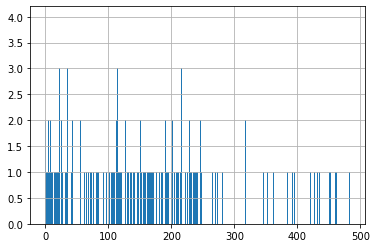

In [66]:
imp_df.pid.hist(bins=500)

In [72]:
imp_df.rename(columns={'turn': 'this_turn'}, inplace=True)
imp_df.rename(columns={'pid': 'particle_id'}, inplace=True)

In [73]:
imp_df

,particle_id,this_turn,int
0,65,0,"[MCS, VR, MCS]"
1,72,0,"[MCS, VR, MCS]"
2,172,0,"[MCS, VR, MCS]"
3,188,0,"[VRCH, MCS]"
4,469,0,[MCS]
...,...,...,...
217,452,17,[CH]
218,462,17,"[MCS, VR, MCS]"
219,352,17,[CH]
220,293,17,[CH]


In [54]:
df_part = part.to_pandas()
drop_list = ['chi', 'charge_ratio', 'pdg_id', 'rvv', 'rpp', '_rng_s1', '_rng_s2', '_rng_s3', '_rng_s4', 'weight', 'ptau', 'q0','gamma0','beta0', 'mass0', 'start_tracking_at_element', 's', 't_sim', 'ay']
float_variables = ['zeta', 'x', 'px', 'y', 'py', 'delta', 'p0c']
int_variables = ['at_turn', 'particle_id', 'at_element', 'state', 'parent_particle_id']
df_part.drop(drop_list, axis=1, inplace=True)
df_part[float_variables] = df_part[float_variables].astype('float32')
df_part[int_variables] = df_part[int_variables].astype('int32')

In [55]:
df_part

,x,px,ax,at_element,parent_particle_id,zeta,particle_id,state,py,y,at_turn,delta,p0c
0,2.818861e-06,2.705058e-05,0.0,0,356,9.617581e-04,356,1,0.000349,0.000008,20,-5.066489e-06,6.800000e+12
1,2.176449e-07,3.888927e-05,0.0,0,375,1.098041e-04,375,1,0.000349,0.000007,20,-3.745426e-07,6.800000e+12
2,-1.198735e-05,-7.564727e-05,0.0,0,444,3.247385e-04,444,1,0.000346,0.000010,20,-1.548272e-06,6.800000e+12
3,-1.584320e-05,-7.777764e-05,0.0,0,430,5.722278e-04,430,1,0.000348,0.000005,20,-2.906881e-06,6.800000e+12
4,-6.913554e-06,-8.032560e-05,0.0,0,34,4.750945e-04,34,1,-0.000045,-0.000013,20,-2.370271e-06,6.800000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.008441e-02,1.809771e-04,0.0,74043,469,-1.609934e-06,469,-331,-0.000014,0.004184,0,-1.074204e-04,6.800000e+12
496,-1.294924e-04,-6.965682e-07,0.0,73357,494,4.702318e-11,494,-331,-0.000012,-0.000928,0,0.000000e+00,6.800000e+12
497,-4.554633e-04,4.667438e-06,0.0,73357,497,5.560485e-11,497,-331,-0.000012,-0.000928,0,0.000000e+00,6.800000e+12
498,4.111030e-04,-4.204631e-06,0.0,73357,476,5.105529e-11,476,-331,-0.000012,-0.000928,0,0.000000e+00,6.800000e+12


In [ ]:
def get_df_to_save(dict, df_part, num_particles, num_turns, epsilon = 0, start = False, x_dim = None, y_dim = None, jaw_L = None):

    float_variables = ['zeta', 'x', 'px', 'y', 'py', 'delta', 'p0c']
    int_variables = ['at_turn', 'particle_id', 'at_element', 'state', 'parent_particle_id']
    variables = float_variables + int_variables
    variables.remove('at_element')

    var_dict = {}

    for var in variables:
        var_dict[var] = dict['data'][var].reshape((num_particles, num_turns))   
    del dict
    gc.enable()
    gc.collect()

    
    impact_part_dict = {}
    for key in var_dict.keys():
        impact_part_dict[key] = []

    if x_dim is not None and jaw_L is not None and y_dim is not None:

        abs_y_low = jaw_L
        abs_y_up = jaw_L + y_dim
        abs_x_low = -x_dim/2
        abs_x_up = x_dim/2

        for part in range(num_particles):
            for turn in range(num_turns):
                if var_dict['state'][part, turn] > 0 and var_dict['x'][part, turn] > (abs_x_low - epsilon) and var_dict['x'][part, turn] < (abs_x_up + epsilon) and var_dict['y'][part, turn] > (abs_y_low - epsilon) and var_dict['y'][part, turn] < (abs_y_up + epsilon):
                    for key in var_dict.keys():
                        impact_part_dict[key].append(var_dict[key][part, turn])

    elif x_dim is None and y_dim is None and jaw_L is not None:
        abs_y_low = jaw_L

        for part in range(num_particles):
            for turn in range(num_turns):
                if var_dict['state'][part, turn] > 0 and var_dict['y'][part, turn] > (abs_y_low - epsilon):
                    for key in var_dict.keys():
                        impact_part_dict[key].append(var_dict[key][part, turn])

    else:
        for part in range(num_particles):
            for turn in range(num_turns):
                if start and turn > 0:
                    continue
                else: 
                    if var_dict['state'][part, turn] > 0:
                        for key in var_dict.keys():
                            impact_part_dict[key].append(var_dict[key][part, turn])

    del var_dict
    gc.collect()


    impact_part_df = pd.DataFrame(impact_part_dict)
    del impact_part_dict
    gc.collect()
    
    impact_part_df.rename(columns={'state': 'this_state'}, inplace=True)
    impact_part_df.rename(columns={'at_turn': 'this_turn'}, inplace=True)
    impact_part_df = pd.merge(impact_part_df, df_part[['at_element', 'state', 'at_turn', 'particle_id']], on='particle_id', how='left')
    
    impact_part_df[float_variables] = impact_part_df[float_variables].astype('float32')
    impact_part_df[int_variables] = impact_part_df[int_variables].astype('int32')
    impact_part_df['this_turn'] = impact_part_df['this_turn'].astype('int32')
    impact_part_df['this_state'] = impact_part_df['this_state'].astype('int32')

    
    return impact_part_df
    

In [74]:
dfimp  = impacts.interactions_per_collimator(tcp)

In [75]:
dfimp

pid  turn
129  4                [MCS, A]
82   12      [MCS, SD, MCS, A]
Name: int, dtype: object

# Crystal

In [6]:
coll = xc.EverestCrystal(length=0.002, material=xc.materials.SiliconCrystal, bending_angle=149e-6,
                         width=0.002, height=0.05, side='+', lattice='strip', jaw=0.001)

num_part = int(1e5)
x_init   = np.random.normal(loc=1.5e-3, scale=75.e-6, size=num_part)
px_init  = np.random.uniform(low=-50.e-6, high=250.e-6, size=num_part)
y_init   = np.random.normal(loc=0., scale=1e-3, size=num_part)
py_init  = np.random.normal(loc=0., scale=5.e-6, size=num_part)
part = xp.Particles(x=x_init, px=px_init, y=y_init, py=py_init, delta=0, p0c=4e11)
part_init = part.copy()

In [7]:
io_buffer = xt.new_io_buffer(capacity=int(2e7)) # 4-5 GB of memory
coll.record_scatterings = True
impacts = xt.start_internal_logging(elements=[coll], io_buffer=io_buffer, capacity=io_buffer.capacity)

In [8]:
%time coll.track(part)

# Sort particles again
part.sort(interleave_lost_particles=True)

CPU times: user 60.9 ms, sys: 7.62 ms, total: 68.5 ms
Wall time: 69.8 ms


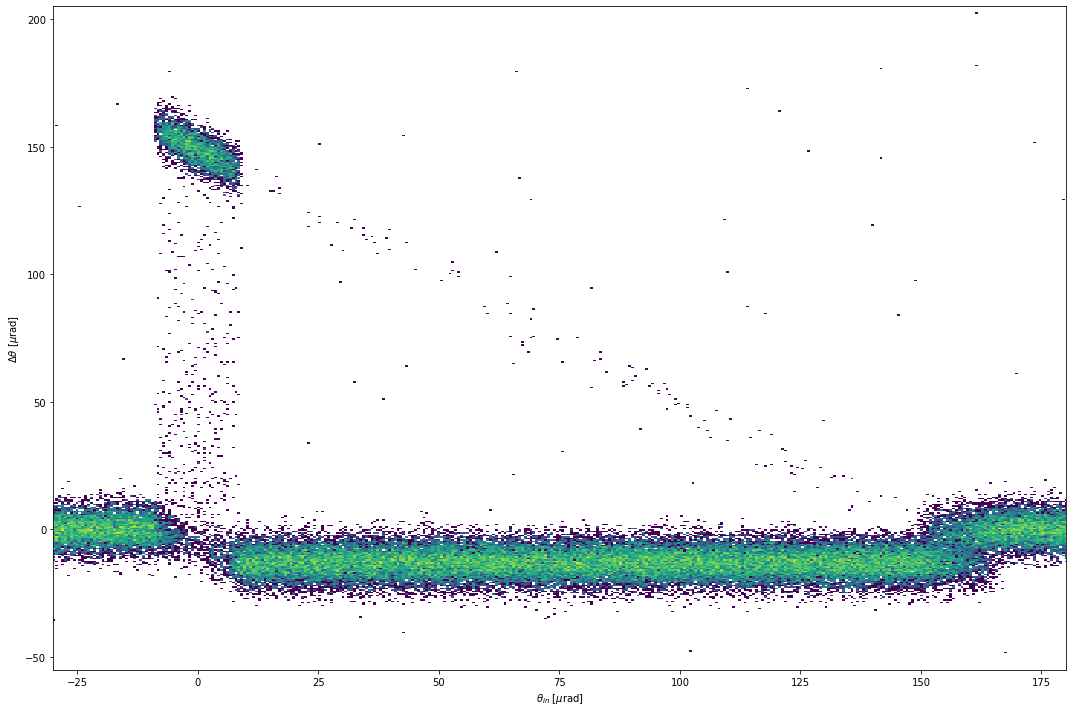

In [9]:
mask = (part.state > 0 ) & ( part.px - part_init.px < 250.e-6) & ( part.px - part_init.px > -50.e-6) #& mask2

plt.figure(figsize=(15,10))
_ = plt.hist2d(part_init.px[mask]*1.e6, part.px[mask]*1.e6 - part_init.px[mask]*1.e6, 500, norm=mpl.colors.LogNorm())
plt.xlim(-30, 180)
plt.ylim(-55, 205)
plt.ylabel(r'$\Delta\theta$ [$\mu$rad]')
plt.xlabel(r'$\theta_{in}$ [$\mu$rad]')
plt.tight_layout()

In [10]:
coll.critical_angle

9.107094106929761e-06

In [11]:
impacts.to_pandas()

KeyError: 4566757905035908622

In [12]:
df = impacts.interactions_per_collimator()
df

ValueError: operands could not be broadcast together with shapes (20000000,) (0,) 

In [32]:
result = np.unique(df.values, return_counts=True)
print(result[1].sum())
for inter, n in zip(result[0], result[1]):
    print(inter, n)

10000000
['CH'] 376489
['CH', 'A'] 368
['CH', 'C', 'MCS'] 1
['CH', 'DCH', 'MCS'] 20592
['CH', 'DCH', 'MCS', 'A'] 48
['CH', 'DCH', 'MCS', 'PN', 'MCS'] 20
['CH', 'DCH', 'MCS', 'PN', 'MCS', 'VR', 'MCS'] 2
['CH', 'DCH', 'MCS', 'PP', 'MCS'] 4
['CH', 'DCH', 'MCS', 'SD', 'MCS'] 2
['CH', 'DCH', 'MCS', 'VC', 'CH'] 47
['CH', 'DCH', 'MCS', 'VC', 'CH', 'DCH', 'MCS'] 2
['CH', 'DCH', 'MCS', 'VC', 'CH', 'DCH', 'MCS', 'VR', 'MCS'] 4
['CH', 'DCH', 'MCS', 'VC', 'MCS'] 6
['CH', 'DCH', 'MCS', 'VC', 'MCS', 'VR', 'MCS'] 2
['CH', 'DCH', 'MCS', 'VR', 'MCS'] 19683
['CH', 'DCH', 'MCS', 'VR', 'MCS', 'A'] 44
['CH', 'DCH', 'MCS', 'VR', 'MCS', 'PN', 'MCS'] 11
['CH', 'DCH', 'MCS', 'VR', 'MCS', 'PN', 'MCS', 'VR', 'MCS'] 3
['CH', 'DCH', 'MCS', 'VR', 'MCS', 'PP', 'MCS'] 1
['CH', 'DCH', 'MCS', 'VR', 'MCS', 'SD', 'MCS'] 3
['CH', 'PN', 'MCS'] 112
['CH', 'PN', 'MCS', 'VR', 'MCS'] 29
['CH', 'PP', 'MCS'] 28
['CH', 'PP', 'MCS', 'VR', 'MCS'] 1
['CH', 'SD', 'MCS'] 25
['MCS'] 4792017
['MCS', 'A'] 31153
['MCS', 'C', 'MCS'] 23
['M

In [34]:
impacts.first_touch_per_turn()

,turn,collimator_id,jaw,id,x,px,y,py,zeta,delta,energy,mass,charge,z,a,pdgid
